# Final Project
## AIM-5014-1A: Experimental Optimization
## Naveen Aliveli, Karthik Katepally, Jianlin Lin
### Group Id 59265


This is a group project.

You are a team of AI engineers responsible for the well-being of a chatbot. Each day you receive a measurement of user satisfaction. It is a noisy number between 0 and 100, and it is your business metric.

After viewing the business metric, you may adjust three configuration parameters that affect the way the system operates and, in turn, the level of user satisfaction.

For this project, you will experimentally optimize the chatbot. You will adjust the configuration parameters to maximize user satisfaction.

## Measurements

The measurements are provided by a server running at [http://44.202.108.53:8080](http://44.202.108.53:8080).  

The parameters are represented by a vector, $x$, which has three components. Each component must lie in $[0,1]$, i.e., $x_i \in [0,1]$.

To take a measurement, you need to know your group id (called `sid`) and the parameters you want to measure (called `x`). For example, say your group id is 123 and want to measure $x = [0.1, 0.2, 0.3]$. You would visit the url

http://44.202.108.53:8080/?sid=59265&x=0.1,0.2,0.3

Note that the x values are separated by commas.

You only get to take one measurement/day.

## Groups

Decide on your groups, then email me. I will respond with your group id.

## Notes

You will learn useful techniques for solving this problem in the coming weeks, but since you only get one measurement/day, time is of the essence.

If you'd like to get a headstart, take a look at these Bayesian optimization tools:

- http://cogneato.xyz
- https://ax.dev
- https://scikit-optimize.github.io/stable/


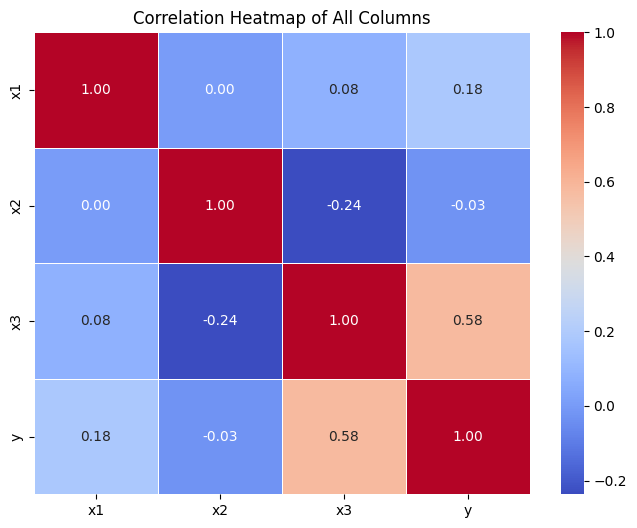

In [95]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data for df1
data = [[0.1, 0.2, 0.3],
        [0.1, 0.5, 0.9],
        [0.1, 0.5, 0.9],
        [0.8, 0.5, 0.4],
        [0.2, 0.6, 0.7],
        [0.283156, 0.92643, 0.365432],
        [0.481526, 0.4, 0.467271],
        [0.8, 0.5, 0.4],
        [0.9, 0.5, 0.6],
        [0.155, 1, 0.217],
        [0.1, 0.5, 0.9],
        [0.436, 1.0, 0.427],
        [0.197, 0.774, 0.344],
        [0.165, 0.991, 0.379],
        [0.161, 0.991, 0.382],
        [0.1, 0.5, 0.9],
        [0.264, 0.767, 0.277],
        [0.302, 0.796, 0.348],
        [0.241, 0.727, 0.372],
        [0.172, 0.534, 0.344],
        [0.251, 0.83, 0.373],
        [0.5, 0.5, 0.5],
        [1, 1, 1]]

# Create DataFrame df1
df1 = pd.DataFrame(data, columns=['x1', 'x2', 'x3'])

# Assuming 'y' is the target variable, you can create a sample 'y' column
y = [0.3, 0.5, 0.7, 0.4, 0.6, 0.8, 0.9, 0.4, 0.5, 0.2, 0.9, 0.7, 0.4, 0.3, 0.8, 0.9, 0.6, 0.5, 0.4, 0.3, 0.2, 1.0, 1.0]
df2 = pd.DataFrame(y, columns=['y'])

# Concatenate df1 and df2 along columns
df = pd.concat([df1, df2], axis=1)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Columns")
plt.show()


# Initialization

Lets spreadout the parameters in the space as below and start with initial design:

In [35]:
x_init = [0.5,0.5,0.5]

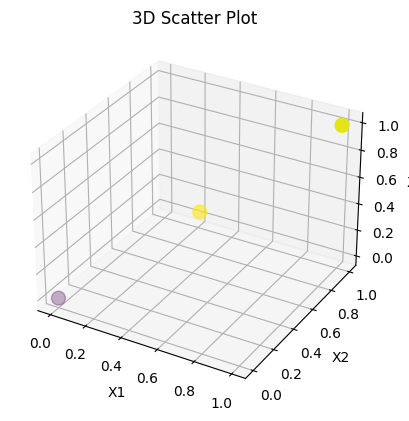

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#spreading the business metric value in the 3D space
x1 = np.array([0.5,1,0])
x2 = np.array([0.5,1,0])
x3 = np.array([0.5,1,0])
y = np.array([97.76561434, 93.8948483827703,0])

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points
ax.scatter(x1, x2, x3, c=y, cmap='viridis', s=100)

# Set labels for axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set a title for the plot
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


# Surrogate Function

In [68]:
from skopt import gp_minimize
from skopt.space import Real

# setting the space bound for the parameters
space = [
    Real(0, 1, name='x1'),
    Real(0, 1, name='x2'),
    Real(0, 1, name='x3')
]
# Initial measurement data
x1,x2,x3 = 0.5,0.5,0.5
y = 97.76561434
# Create a list with the initial measurement data
initial_data = [(x1, x2, x3)]

#noise generating function
def business_metric(x1, x2, x3):
    import numpy as np
    noise_bm = np.random.normal(scale=1) 
    return (x1 + x2 + x3) * 100 + noise_bm

#as we need to maximize here we need to add th eminus symbol acts like a black box function
def black_box(params):
    x1, x2, x3 = params
    return -business_metric(x1, x2, x3)

# Bayesian Optimization with gpr as surrogate
result = gp_minimize(
    black_box,
    dimensions=space,
    acq_func='EI',
    n_calls=35,
    random_state=42,
    base_estimator="GP",      # Use Gaussian Process as the surrogate model
    y0=[y],              # Provide the corresponding objective function value for the initial measurement
    x0=initial_data           # Provide the initial data as a list of tuples
)


# Fit the Gaussian Process with all data points
X = np.array(initial_data + [result.x])  # Add the new best parameter to the data
y = np.array([business_metric(*data) for data in X])  # Evaluate the function for all data points
surrogate_model = GaussianProcessRegressor(kernel=RBF(), n_restarts_optimizer=20)
surrogate_model.fit(X, y)

# Generate test data for plotting
X_test = np.array([[x1, x2, x3] for x1 in np.linspace(0, 0.1, 1)
                                    for x2 in np.linspace(0, 0.1,1)
                                    for x3 in np.linspace(0, 0.1,1)])

# Predict the mean and uncertainty (standard deviation) for the test data
y_pred, sigma = surrogate_model.predict(X_test, return_std=True)

# Calculate the mean and standard deviation of the surrogate function predictions
surrogate_mean = np.mean(y_pred)
surrogate_std = np.std(y_pred)

print(f"Surrogate Function Mean: {surrogate_mean}")
print(f"Surrogate Function Standard Deviation: {surrogate_std}")


C:\Users\karth\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Surrogate Function Mean: 18.837394192268615
Surrogate Function Standard Deviation: 0.0


#  GPR - Gaussian Process Regression

In [94]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels 
import RBF, Matern, RationalQuadratic

#measurements
X = np.array([
[0.1,0.2,0.3],
[0.1,0.5,0.9],
[0.1,0.5,0.9],
[0.8,0.5,0.4],
[0.2,0.6,0.7],
[0.283156,0.92643,0.365432],
[0.481526,0.4,0.467271],
[0.8,0.5,0.4],
[0.9,0.5,0.6],
[0.155,1,0.217],
[0.1,0.5,0.9],
[0.436,1.0	,0.427],
[0.197,0.774,0.344],
[0.165,0.991,0.379],
[0.161,0.991,0.382],
[0.1,0.5,0.9],
[0.264,0.767,0.277],
[0.302,0.796,0.348],
[0.241,0.727,0.372],
[0.172,0.534,0.344],
[0.251,0.83,0.373],
[0.5,0.5,0.5],
[1,1,1]
])

y = np.array([99.86455712,95.483407,93.12522307,92.55747387,93.92974284,101.7179367,94.72680243,94.93387964,98.39561073,98.99319699,96.63121109,96.863781,101.5826367,96.83118917,94.83118917,96.35019219,97.40615807,100.2753118,101.4820925,98.41158094,96.22352016,97.76561434,93.89484838
])

# Define the list of built-in kernels
kernels = [RBF(), Matern(), RationalQuadratic()]

# Create a dictionary to store surrogate models for each kernel
surrogate_models = {}

for kernel in kernels:
    # Create the Gaussian Process Regression model
    surrogate = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

    # Fit the model to the data
    surrogate.fit(X, y)

    # Store the surrogate model in the dictionary
    surrogate_models[kernel.__class__.__name__] = surrogate

# Now you have three surrogate models, one for each kernel
# You can use these models for prediction later

# Example prediction using the first kernel (RBF)
X_pred = np.array([[0.25, 0.3, 0.4], [0.5, 0.6, 0.7]])  # Example prediction points
y_pred_rbf, sigma_rbf = surrogate_models['RBF'].predict(X_pred, return_std=True)

# Example prediction using the second kernel (Matern)
y_pred_matern, sigma_matern = surrogate_models['Matern'].predict(X_pred, return_std=True)

# Example prediction using the third kernel (RationalQuadratic)
y_pred_rational, sigma_rational = surrogate_models['RationalQuadratic'].predict(X_pred, return_std=True)

print(50*"*")
print("RBF")
print(50*"*")
print("Predicted Y value :",y_pred_rbf)
print("Uncertainity(Sigma) :",sigma_rbf[0])
print()
print(50*"*")
print("Matern")
print(50*"*")
print("Predicted Y value :",y_pred_matern)
print("Uncertainity(Sigma) :",sigma_matern)
print()
print(50*"*")
print("RationalQuadratic")
print(50*"*")
print("Predicted Y value :",y_pred_rational)
print("Uncertainity(Sigma) :",sigma_rational)

C:\Users\karth\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\karth\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


**************************************************
RBF
**************************************************
Predicted Y value : [48.05403138 21.22521116]
Uncertainity(Sigma) : 0.936142135975467

**************************************************
Matern
**************************************************
Predicted Y value : [98.65158635 86.42194182]
Uncertainity(Sigma) : [0.56162924 0.67801076]

**************************************************
RationalQuadratic
**************************************************
Predicted Y value : [9.72110763 3.90360447]
Uncertainity(Sigma) : [0.99749864 0.99892653]


##  Acquisition Function

In [81]:
from scipy.optimize import minimize
# Seting the bounds for three parameters
bounds = [(0, 1),
          (0, 1), 
          (0, 1)]
beta=1
# Upper bound confidence considering 1
def upper_bound_confidence(x, model, beta):
    mean, std = model.predict(x.reshape(1, -1), return_std=True)
    return -(mean + beta * std)  # Minimize the negative UCB to maximize the UCB



# Optimize the UCB function using the GPR model RationalQuadratic
result_RBF = minimize(upper_bound_confidence, x0=[0.5, 0.5, 0.5], args=(surrogate_models['RBF'],  1), bounds=bounds)
result_Matern = minimize(upper_bound_confidence, x0=[0.5, 0.5, 0.5], args=(surrogate_models['Matern'], 1), bounds=bounds)
result_RationalQuadratic = minimize(upper_bound_confidence, x0=[0.5, 0.5, 0.5], args=(surrogate_models['RationalQuadratic'],  1), bounds=bounds)
# Get the optimal parameters that maximize the UCB function


# Evaluate the actual objective function to get the corresponding y_mean and y_se (if needed)
RBF_y_mean_optimal, RBF_y_std_optimal = surrogate_models['RBF'].predict(np.array([optimal_params]), return_std=True)
Matern_y_mean_optimal, Matern_y_std_optimal = 
surrogate_models['Matern'].predict(np.array([optimal_params]), return_std=True)
RationalQuadratic_y_mean_optimal, RationalQuadratic_y_std_optimal = 
surrogate_models['RationalQuadratic'].predict(np.array([optimal_params]), return_std=True)

print(70*'*')
print("RBF")
print(70*'*')
print("Optimal Parameters:",result_RBF.x)
print("Optimal UCB Value:", -result_RBF.fun)  # Convert back to maximize the UCB function
print("Corresponding y_mean at Optimal Point:", RBF_y_mean_optimal[0])
print("Corresponding y_std at Optimal Point:", RBF_y_std_optimal[0])


print(70*'*')
print("Matern")
print(70*'*')
print("Optimal Parameters:",result_Matern.x)
print("Optimal UCB Value:", -result_Matern.fun)  # Convert back to maximize the UCB function
print("Corresponding y_mean at Optimal Point:", Matern_y_mean_optimal[0])
print("Corresponding y_std at Optimal Point:", Matern_y_std_optimal[0])


print(70*'*')
print("RationalQuadratic")
print(70*'*')
print("Optimal Parameters:",result_RationalQuadratic.x)
print("Optimal UCB Value:", -result_RationalQuadratic.fun)  # Convert back to maximize the UCB function
print("Corresponding y_mean at Optimal Point:", RationalQuadratic_y_mean_optimal[0])
print("Corresponding y_std at Optimal Point:", RationalQuadratic_y_std_optimal[0])


**********************************************************************
RBF
**********************************************************************
Optimal Parameters: [0.49402758 0.45670355 0.48024749]
Optimal UCB Value: 103.63118825945098
Corresponding y_mean at Optimal Point: 1.0180254064509269
Corresponding y_std at Optimal Point: 0.9999594786226118
**********************************************************************
Matern
**********************************************************************
Optimal Parameters: [0.29165326 0.61415503 0.41930188]
Optimal UCB Value: 101.80733082015043
Corresponding y_mean at Optimal Point: 48.664646703749895
Corresponding y_std at Optimal Point: 0.9087052936182423
**********************************************************************
RationalQuadratic
**********************************************************************
Optimal Parameters: [0.34561673 0.71448577 0.31338165]
Optimal UCB Value: 98.93349871144727
Corresponding y_mean at Optimal Point

References: 

https://towardsdatascience.com/bayesian-optimization-a-step-by-step-approach-a1cb678dd2ec

https://machinelearningmastery.com/what-is-bayesian-optimization/